# Projet Machine Learning pour la Prévision: séries temporelles

##### L’objectif principal de l’analyse d’une série temporelle est la prévision de ses futures réalisations en se basant sur ses valeurs passées
##### Une série temporelle $Yt$ est communément décomposée en tendance, saisonnalité, bruit:
$$Y_t=T_t+S_t+ε_t$$
##### la tendance $T_t$ correspond à une évolution à long terme de la série, par exemple:
-  tendance linéaire: $T_t=a+bt$
-  tendance quadratique: $T_t=a+bt+ct2$
- tendance logarithmique: $T_t=log(t)$
- tendance exponentielle: $T_t=exp(t)$

##### la saisonnalité $S_t$ correspond à un phénoméne périodique de période identifiée

##### l’erreur $\epsilon_t$ qui est la partie aléatoire de la série

##### Le but cette décomposition est de se ramener à un bruit εt stationnaire. Cette décomposition peut être additive $Y_t=T_t+S_t+ε_t$, multiplicative $Y_t=T_t∗S_t∗ε_t$ ou des combinaisons des deux:
$$ Y_t=(T_t+S_t)∗ε_t$$
$$ Y_t=(T_t*S_t)+ε_t$$

### Generation de  series temporelles

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generer_serie_temporelle(nombre_points=100,tendance=0.1,amplitude_saisonnalite=10,periode_saisonnalite=12,bruit_std=1.0,frequence=1.0,date_debut='2020-01-01'):
    """
    Génère une série temporelle avec tendance, saisonnalité et bruit.

    Parameters:
    - nombre_points (int): Nombre de points dans la série temporelle.
    - tendance (float): Pente de la tendance linéaire.
    - amplitude_saisonnalite (float): Amplitude de la composante saisonnière.
    - periode_saisonnalite (int): Période de la saisonnalité (par exemple, 12 pour mensuel).
    - bruit_std (float): Écart-type du bruit aléatoire.
    - frequence (float): Fréquence des dates (par défaut quotidien).
    - date_debut (str): Date de début au format 'YYYY-MM-DD'.

    Returns:
    - pd.Series: Série temporelle générée.
    """
   
    # Générer la séquence de dates
    dates = pd.date_range(start=date_debut, periods=nombre_points, freq='D' if frequence == 1.0 else 'H')

    # Générer la tendance linéaire
    tendance_valeurs = tendance * np.arange(nombre_points)

    # Générer la composante saisonnière
    saisonalite_valeurs = amplitude_saisonnalite * np.sin(2 * np.pi * np.arange(nombre_points) / periode_saisonnalite)

    # Générer le bruit aléatoire
    bruit = np.random.normal(0, bruit_std, nombre_points)

    # Combiner les composantes pour créer la série temporelle
    serie = tendance_valeurs + saisonalite_valeurs + bruit
    # Créer une série pandas avec les dates comme index
    serie_temporel = pd.Series(data=serie, index=dates)

    return serie_temporel

# Paramètres de la série temporelle
nombre_points = 365  # Un an de données journalières
tendance =0.05
amplitude_saisonnalite =10
periode_saisonnalite = 30  # Approximativement un mois
bruit_std = 2.0
frequence =1.0  # Quotidien
date_debut = '2023-01-01'

    

# Générer la série temporelle
serie = generer_serie_temporelle(
        nombre_points=nombre_points,
        tendance=tendance,
        amplitude_saisonnalite=amplitude_saisonnalite,
        periode_saisonnalite=periode_saisonnalite,
        bruit_std=bruit_std,
        frequence=frequence,
        date_debut=date_debut)

# Afficher les premières lignes de la série
print(serie.head())


   

2023-01-01     1.078878
2023-01-02     2.661744
2023-01-03     8.217776
2023-01-04    10.399210
2023-01-05     6.942240
Freq: D, dtype: float64


### Visualisation d'une serie temporelle

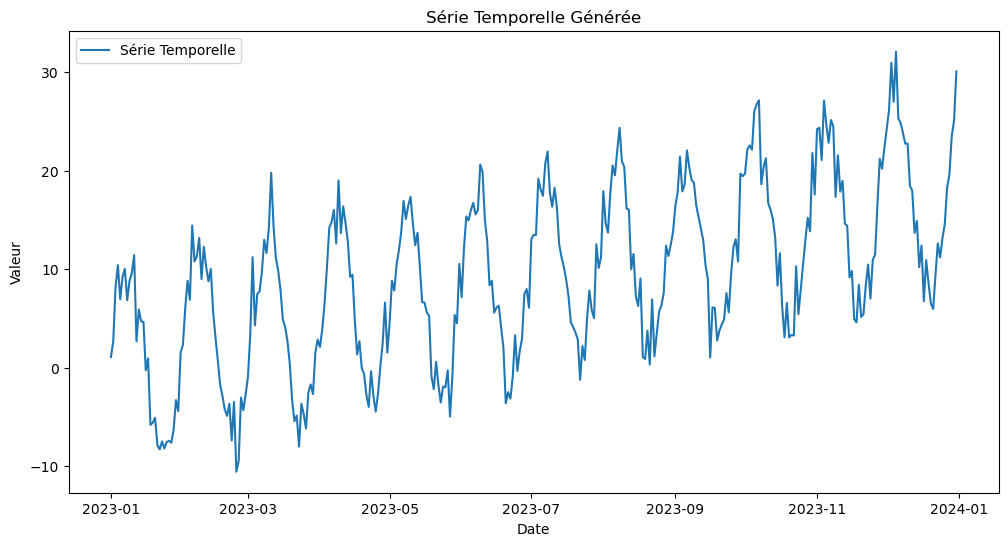

In [7]:
# Visualiser la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(serie, label='Série Temporelle')
plt.title('Série Temporelle Générée')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()

### Stationnarite

- Pour modeliser une serie temporelle, il faut qu'il soit stationnaire. La stationnarite fait reference une serie temporelle dont la distribution des donnees  n'evolue pas avec temps.

- Au sens mathematique fort, une serie temporelle $Y_t$ est stationnaire si $\forall$ fonction mesurable $f$, $f(Y_1,Y_2,...,Y_t)$ et $f(Y_{1+h},Y_{2+h},...,Y_{t+h})$ ont la même loi.

Cette notion de stationnarité forte est très difficile à vérifier en pratique. On lui préfère généralement la notion de stationnarité faible qui porte sur les moments d’ordre 1 et 2 du processus aleatoire.

soit un series temporelle $(Y_t)$, $t ∈ \mathbb{Z}$
 tel que $E(Y_t)<∞$
, il est dit stationnaire au sens faible (ou d’ordre 2) si son espérance est constante et ses auto-covariances sont stables dans le temps ie:
$$\forall t, E(Y_t)=μ$$
 
%$$\forall t, cov(Y_t,Y_{t+h})=γ(h)$$ . 

On remarque que pour $h = 0$ on a $\gamma(0)= cov(Y_t,Y_t)= var(Y_t)$. il faut donc que la variance soit constante.
 





- La tendance est nulle, c'est a dire qu'elle n'augmente par ou ne diminue pas ne diminue pas avec le temps.
- La valeurs moyenne soit constante. 
- La variance est constante, c'est a dire la variation moyenne par rapport a la droite $y = 0 $ est contante.
- L'autocorrelation est constante, c'est a dire que la correlation entre chaque valeur et les valeurs qui les precedent dans le temps reste contante. 

### Exemple de processus stationnaire
- Les Bruit blancs  $ε_t$: Sont des processus aleatoires pour lesquels chacune de leurs valeurs n'a aucune dependendance avec leurs voisins dans le temps. Les bruits blancs
 vérifiant $E(ε_t)=μ$ et $var(ε_t)=σ^2$ sont stationnaires. 
- Le processus gaussien $(Y_t)_{t∈ \mathbb{Z}}$ tel que $E(Y_t)=μ$ et $cov(Y_t,Y_{t+h})=α^{|h|}$,$(|α|<1)$
- Le processus moyenne mobile $X_t=ε_t+a_1ε_{t−1}+a_2ε_{t−2}+...+a_qε_{t−q}$
- processus autorégressif d’ordre 1:
$$Y_t=aY_{t−1}+ε_t$$


En pratique, on ne connait pas explicitement les fonctions d’auto-covariance et d’auto-corrélation. Il est donc nécessaire de les estimer en se basant sur des observations.

### Autocovariance
soit une série d’observations $(Y_t)_{t∈(1,...,n)}$ notons $\bar{Y}=\frac{1}{n}\sum_{t=1}^nY_t$, alors la fonction d’auto-covariance empirique vaut, pour tout $h ∈(0,...,n−1)$

$\hat{\gamma}(h)=\frac{1}{n−h}\sum_{t=h+1}^n(Y_t−\bar{Y})(Y_{t−h}−\bar{Y})$





In [51]:
#  code de calcul de l'auto covariance d'une serie temporelle 
def autocovariance(data, timelag):
    """estimate the auto covariance of the data."""
    mean_data  = np.mean(data.values)
    length_data = data.shape[0]

    factor_1 = data.values[:-timelag,-1]-mean_data
    factor_2 = data.values[timelag:,-1]-mean_data
    return np.sum(factor_1*factor_2)/(length_data-timelag)

# Estimation de l'auto correlation d'une serie temporelle
data = pd.read_csv('../data/AirPassengers.csv', parse_dates = True, index_col = 'Month')
print('airpassengers timeseries autocovariance', round(autocovariance(data,1),2))

airpassengers timeseries autocovariance 13644.22


#### AutoCorrelation

soit une série d’observations $(Y_t)_{t∈(1,...,n)}$ notons $\bar{Y}=\frac{1}{n}\sum_{t=1}^nY_t$, alors la fonction d’autocorrelation empirique vaut, pour tout $h ∈(0,...,n−1)$

$\hat{\rho}(h)=\frac{\frac{1}{n−h}\sum_{t=h+1}^n(Y_t−\bar{Y})(Y_{t−h}−\bar{Y})}{\frac{1}{n}(Y_t−\bar{Y})^2}$


In [64]:
#  code du calcul d'autocorrelation d'une serie temporelle
def autocovariance(data, timelag):
    """estimate the auto covariance of the data."""
    mean_data  = np.mean(data.values)
    length_data = data.shape[0]
    num_factor_1 = data.values[:-timelag,-1]-mean_data
    num_factor_2 = data.values[timelag:,-1]-mean_data
    denominator = np.sum((data.values-mean_data)**2)/length_data
    numerator = np.sum(num_factor_1*num_factor_2)/(length_data-timelag)
    return numerator/denominator

# Estimation de l'auto correlation d'une serie temporelle
data = pd.read_csv('../data/AirPassengers.csv', parse_dates = True, index_col = 'Month')
print('airpassengers timeseries autocorrelation', round(autocovariance(data,1),2))

airpassengers timeseries autocorrelation 0.95


array([[1.        , 0.96019465],
       [0.96019465, 1.        ]])